In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('historical_robocalls_by_city.csv')

In [3]:
df.head()

,City,State,2021 (so far),2020,2019,2018,2017,2016
0,Abilene,TX,"38,402,300","53,984,400","67,974,500","42,255,600","27,058,500","18,618,000"
1,Akron,OH,"153,971,400","297,437,800","365,030,100","256,687,400","163,845,400","118,511,000"
2,Albany,GA,"110,537,800","191,977,200","224,315,900","165,630,300","101,086,300","75,714,000"
3,Albuquerque,NM,"77,203,100","137,051,500","162,382,200","120,920,800","73,921,200","50,755,500"
4,Alexandria,VA,"181,831,200","327,847,600","444,056,300","370,415,000","225,702,400","156,221,500"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   City           188 non-null    object
 1   State          188 non-null    object
 2   2021 (so far)  188 non-null    object
 3   2020           188 non-null    object
 4   2019           188 non-null    object
 5   2018           188 non-null    object
 6   2017           188 non-null    object
 7   2016           188 non-null    object
dtypes: object(8)
memory usage: 11.9+ KB


In [5]:
#Removing the ',' so I can convert str to int

df['2021 (so far)'] = df['2021 (so far)'].apply(lambda x: x.replace(",", ""))
df['2020'] = df['2020'].apply(lambda x: x.replace(",", ""))
df['2019'] = df['2019'].apply(lambda x: x.replace(",", ""))
df['2018'] = df['2018'].apply(lambda x: x.replace(",", ""))
df['2017'] = df['2017'].apply(lambda x: x.replace(",", ""))
df['2016'] = df['2016'].apply(lambda x: x.replace(",", ""))

In [6]:
#checking they are removed

df[['2021 (so far)', '2020', '2019', '2018', '2017', '2016']].head()

,2021 (so far),2020,2019,2018,2017,2016
0,38402300,53984400,67974500,42255600,27058500,18618000
1,153971400,297437800,365030100,256687400,163845400,118511000
2,110537800,191977200,224315900,165630300,101086300,75714000
3,77203100,137051500,162382200,120920800,73921200,50755500
4,181831200,327847600,444056300,370415000,225702400,156221500


In [7]:
df['2021 (so far)'] = df['2021 (so far)'].astype(int)
df['2020'] = df['2020'].astype(int)
df['2019'] = df['2019'].astype(int)
df['2018'] = df['2018'].astype(int)
df['2017'] = df['2017'].astype(int)
df['2016'] = df['2016'].astype(int)

In [8]:
#checking

type(df['2020'][0])

numpy.int64

In [9]:
df_totals = df[['2021 (so far)', '2020', '2019', '2018', '2017', '2016']].sum()
df_totals = pd.DataFrame(df_totals)
df_totals.reset_index()
df_totals.columns=["total"]

In [10]:
df_totals.index.rename('year')

Index(['2021 (so far)', '2020', '2019', '2018', '2017', '2016'], dtype='object', name='year')

In [11]:
df_totals

,total
2021 (so far),26442370900
2020,46058603400
2019,58565475900
2018,47617899700
2017,30399099900
2016,23484590000


<AxesSubplot:>

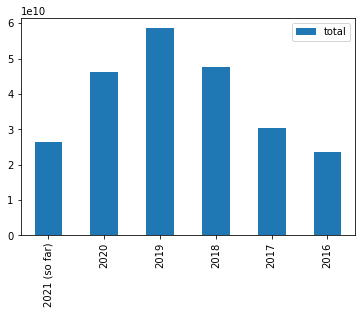

In [51]:
#What happened after 2019?

df_totals.plot(kind='bar')

In [14]:
cols_to_sum = df.columns.values

In [15]:
df['Total'] = df[cols_to_sum].sum(axis = 1)

In [21]:
df_sorted = df.sort_values(by='Total', ascending=False)
df_sorted.head()

,City,State,2021 (so far),2020,2019,2018,2017,2016,Total
7,Atlanta,GA,1000960000,1849974800,2323036100,2091151400,1362383600,1250466000,9877971900
41,Dallas,TX,939439500,1679555500,2199532300,1845251500,1175870000,982095500,8821744300
122,New York,NY,782982500,1391835200,1870007100,1728517300,1175411700,974481500,7923235300
29,Chicago,IL,814955000,1363815900,1780823300,1580507400,1105909500,872028500,7518039600
77,Houston,TX,720141300,1330977300,1782568100,1491645200,1011463300,961063500,7297858700


In [33]:
df_sorted.describe()

,2021 (so far),2020,2019,2018,2017,2016,Total
count,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02
mean,1.406509e+08,2.449926e+08,3.115185e+08,2.532867e+08,1.616973e+08,1.249180e+08,1.237064e+09
std,1.578000e+08,2.885434e+08,3.771059e+08,3.300546e+08,2.142665e+08,1.795423e+08,1.541397e+09
min,2.140000e+04,0.000000e+00,1.300000e+03,0.000000e+00,0.000000e+00,0.000000e+00,5.120000e+04
25%,4.827918e+07,8.020490e+07,1.019147e+08,7.551065e+07,4.893900e+07,3.495625e+07,3.917998e+08
50%,9.544275e+07,1.542200e+08,1.887948e+08,1.448508e+08,9.548185e+07,6.850725e+07,7.371950e+08
75%,1.720234e+08,2.961119e+08,3.912984e+08,3.073758e+08,1.979060e+08,1.477285e+08,1.488511e+09
max,1.000960e+09,1.849975e+09,2.323036e+09,2.091151e+09,1.362384e+09,1.250466e+09,9.877972e+09


<AxesSubplot:xlabel='City,State,2021 (so far),2020,2019,2018,2017,2016,Total'>

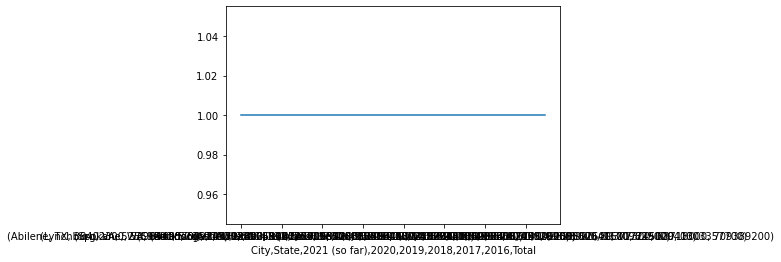

In [41]:
#line chart where each line is a city with year columns on the x axis

df_sorted.value_counts().plot(kind='line')